<a href="https://colab.research.google.com/github/Seunghyun9810/TIL/blob/ML/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 분석 목표
- 붓꽃의 품종을 분류할 수 있는 특성 분석 및 시각화

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
iris = pd.read_csv('/content/drive/MyDrive/KDT/ML/data/iris_dataset.csv')
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1. EDA

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


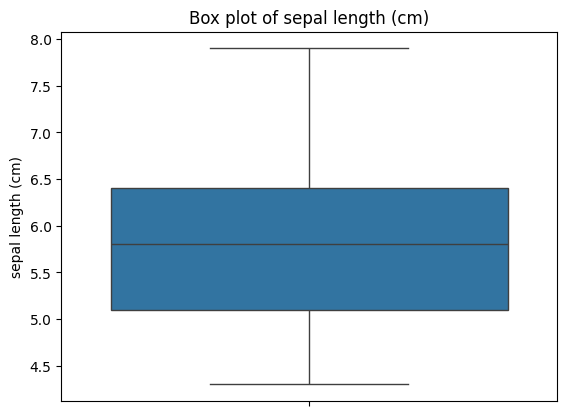

----------------------------------------------------------------------------------------------------


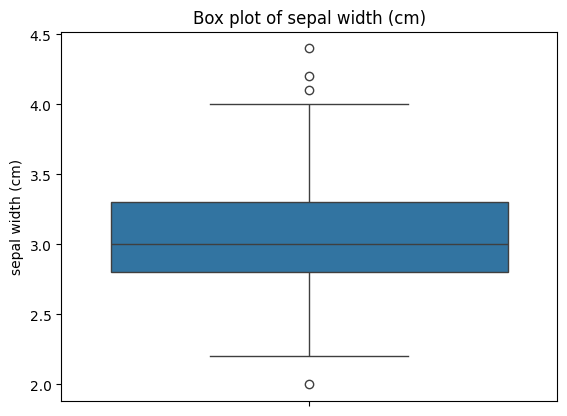

----------------------------------------------------------------------------------------------------


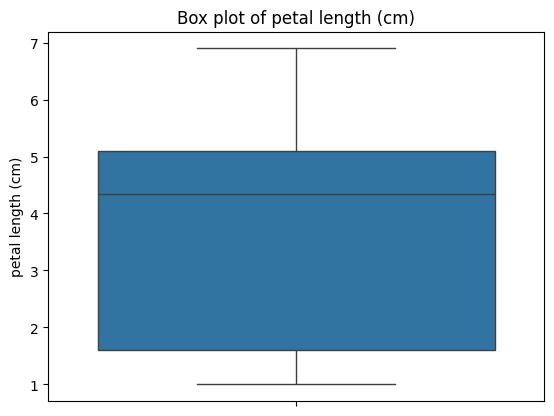

----------------------------------------------------------------------------------------------------


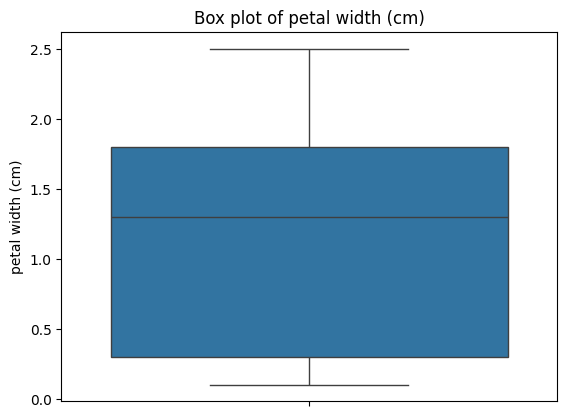

----------------------------------------------------------------------------------------------------


In [ ]:
# outlier 존재 여부 확인
for col in iris.columns:
    if iris[col].dtype == 'object':
        pass
    else:
        sns.boxplot(iris, y=f'{col}')
        plt.title(f'Box plot of {col}')
        plt.show()
        print('-' * 100)

In [ ]:
# sepal width 컬럼 이상치 확인
q1 = iris['sepal width (cm)'].quantile(0.25)
q3 = iris['sepal width (cm)'].quantile(0.75)

iqr = q3 - q1

iris.loc[(iris['sepal width (cm)'] <= q1 - 1.5 * iqr) | (iris['sepal width (cm)'] >= q3 + 1.5 * iqr), :]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
15,5.7,4.4,1.5,0.4,setosa
32,5.2,4.1,1.5,0.1,setosa
33,5.5,4.2,1.4,0.2,setosa
60,5.0,2.0,3.5,1.0,versicolor


꽃받침 넓이 컬럼의 이상치들을 꽃받침 길이와 비교했을 때, 그 차이가 유의미하다고 보기 어렵다.

따라서 넓이 컬럼의 이상치들은 삭제하지 않는다.

In [ ]:
# label 별 데이터 수 확인
iris.value_counts('label')

,count
label,
setosa,50
versicolor,50
virginica,50


In [ ]:
# column 호출 용이성 증대
cols = iris.columns

### 모델링에 사용할 변수 결정

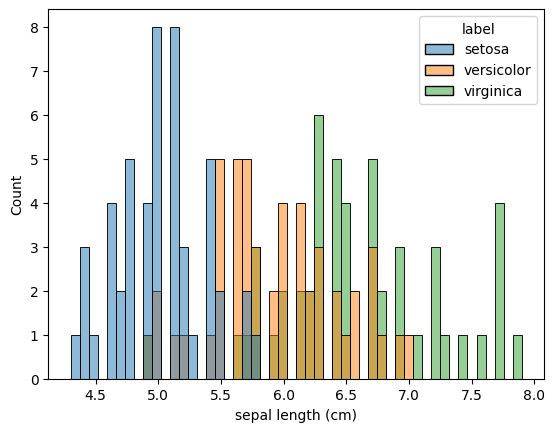

In [ ]:
# sepal length by labels
sns.histplot(iris, x=cols[0], hue='label', bins=50)
plt.show()

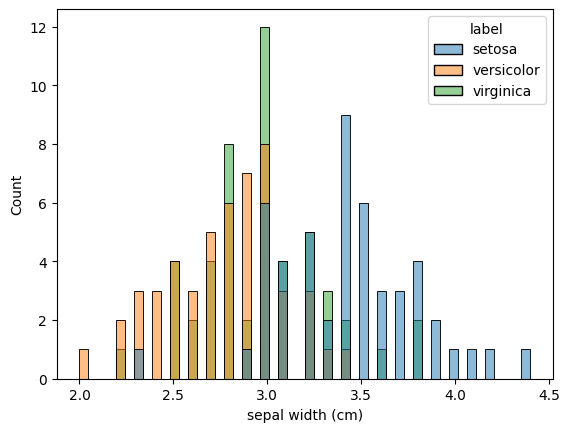

In [ ]:
# sepal width by labels
sns.histplot(iris, x=cols[1], hue='label', bins=50)
plt.show()

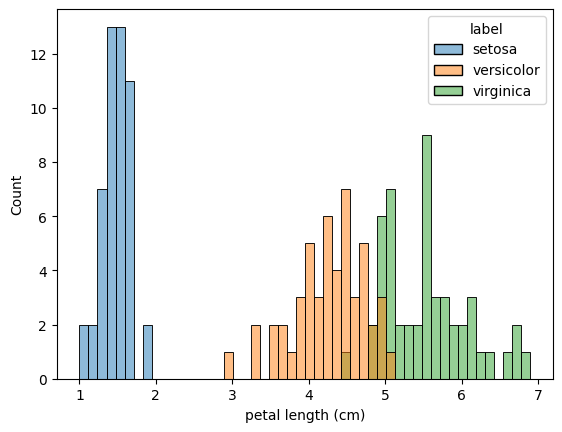

In [ ]:
# petal lengths by label
sns.histplot(iris, x=cols[2], hue='label', bins=50)
plt.show()

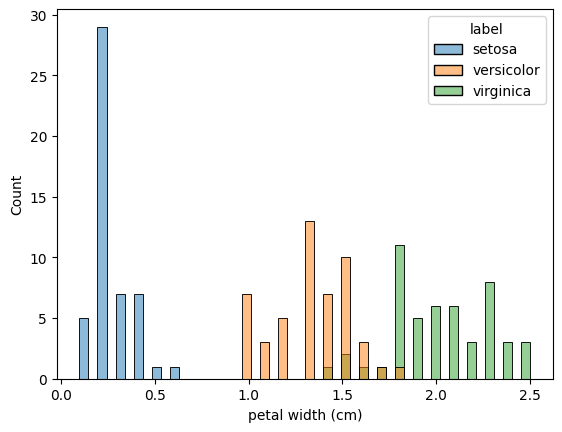

In [ ]:
# petal widths by labels
sns.histplot(iris, x=cols[3], hue='label', bins=50)
plt.show()

> 소결 1
    
    각 품종별로 구분이 비교적 명확하게 되는 꽃잎의 길이와 넓이를 기준으로 모델링 진행하는 것이 바람직하다.

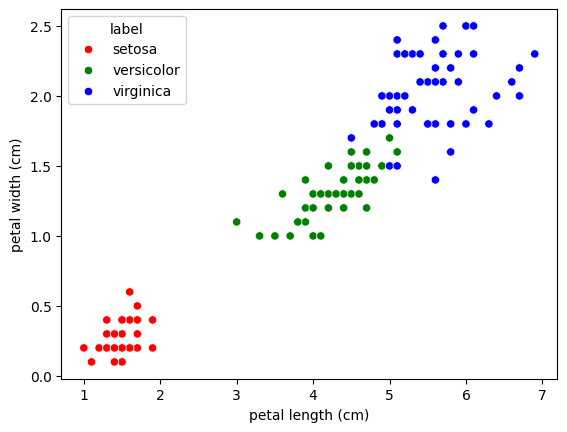

In [ ]:
# correlation between petal length and width
sns.scatterplot(iris, x=cols[2], y=cols[3], hue='label', palette=['red', 'green', 'blue'])
plt.show()

> 소결 2
    
    1. setosa 품종은 특성이 명확하여 다른 품종과 구분이 용이하다.(petal length <= 2)
    2. versicolor 과 virginica 는 구분이 어려운 구간이 있어 결정경계를 찾아가야 한다.

### 비교 연산자를 이용한 품종 분류

In [ ]:
iris.loc[iris['label'] == 'setosa', [cols[2], cols[3]]].describe()

,petal length (cm),petal width (cm)
count,50.000000,50.000000
mean,1.462000,0.246000
std,0.173664,0.105386
min,1.000000,0.100000
25%,1.400000,0.200000
50%,1.500000,0.200000
75%,1.575000,0.300000
max,1.900000,0.600000


In [ ]:
iris.loc[iris[cols[2]] <= 1.9, 'label']

,label
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
5,setosa
6,setosa
7,setosa
8,setosa
9,setosa


## 2. 모델링

In [ ]:
# label encoding
pd.set_option('future.no_silent_downcasting', True)
iris = iris.replace({'setosa': 0, 'versicolor': 1, 'virginica': 2})

In [ ]:
# X_data(feature)
X_data = iris.iloc[:, :-1]

In [ ]:
# y_data
y_data = iris['label'].astype(int)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                    y_data,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=y_data)

In [ ]:
print(X_train.index)
print(y_train.index)

Index([ 45,   1,  38,   7,  82,  37, 108, 124,  72, 127,
       ...
       130, 138,  29,  64,  52, 145,  34, 117, 128, 106],
      dtype='int64', length=120)
Index([ 45,   1,  38,   7,  82,  37, 108, 124,  72, 127,
       ...
       130, 138,  29,  64,  52, 145,  34, 117, 128, 106],
      dtype='int64', length=120)


In [ ]:
print(y_train.value_counts())

label
0    40
1    40
2    40
Name: count, dtype: int64


### Decision Tree 모델 생성

In [ ]:
# generate model
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=0)

In [ ]:
# model learning
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
# visualize decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

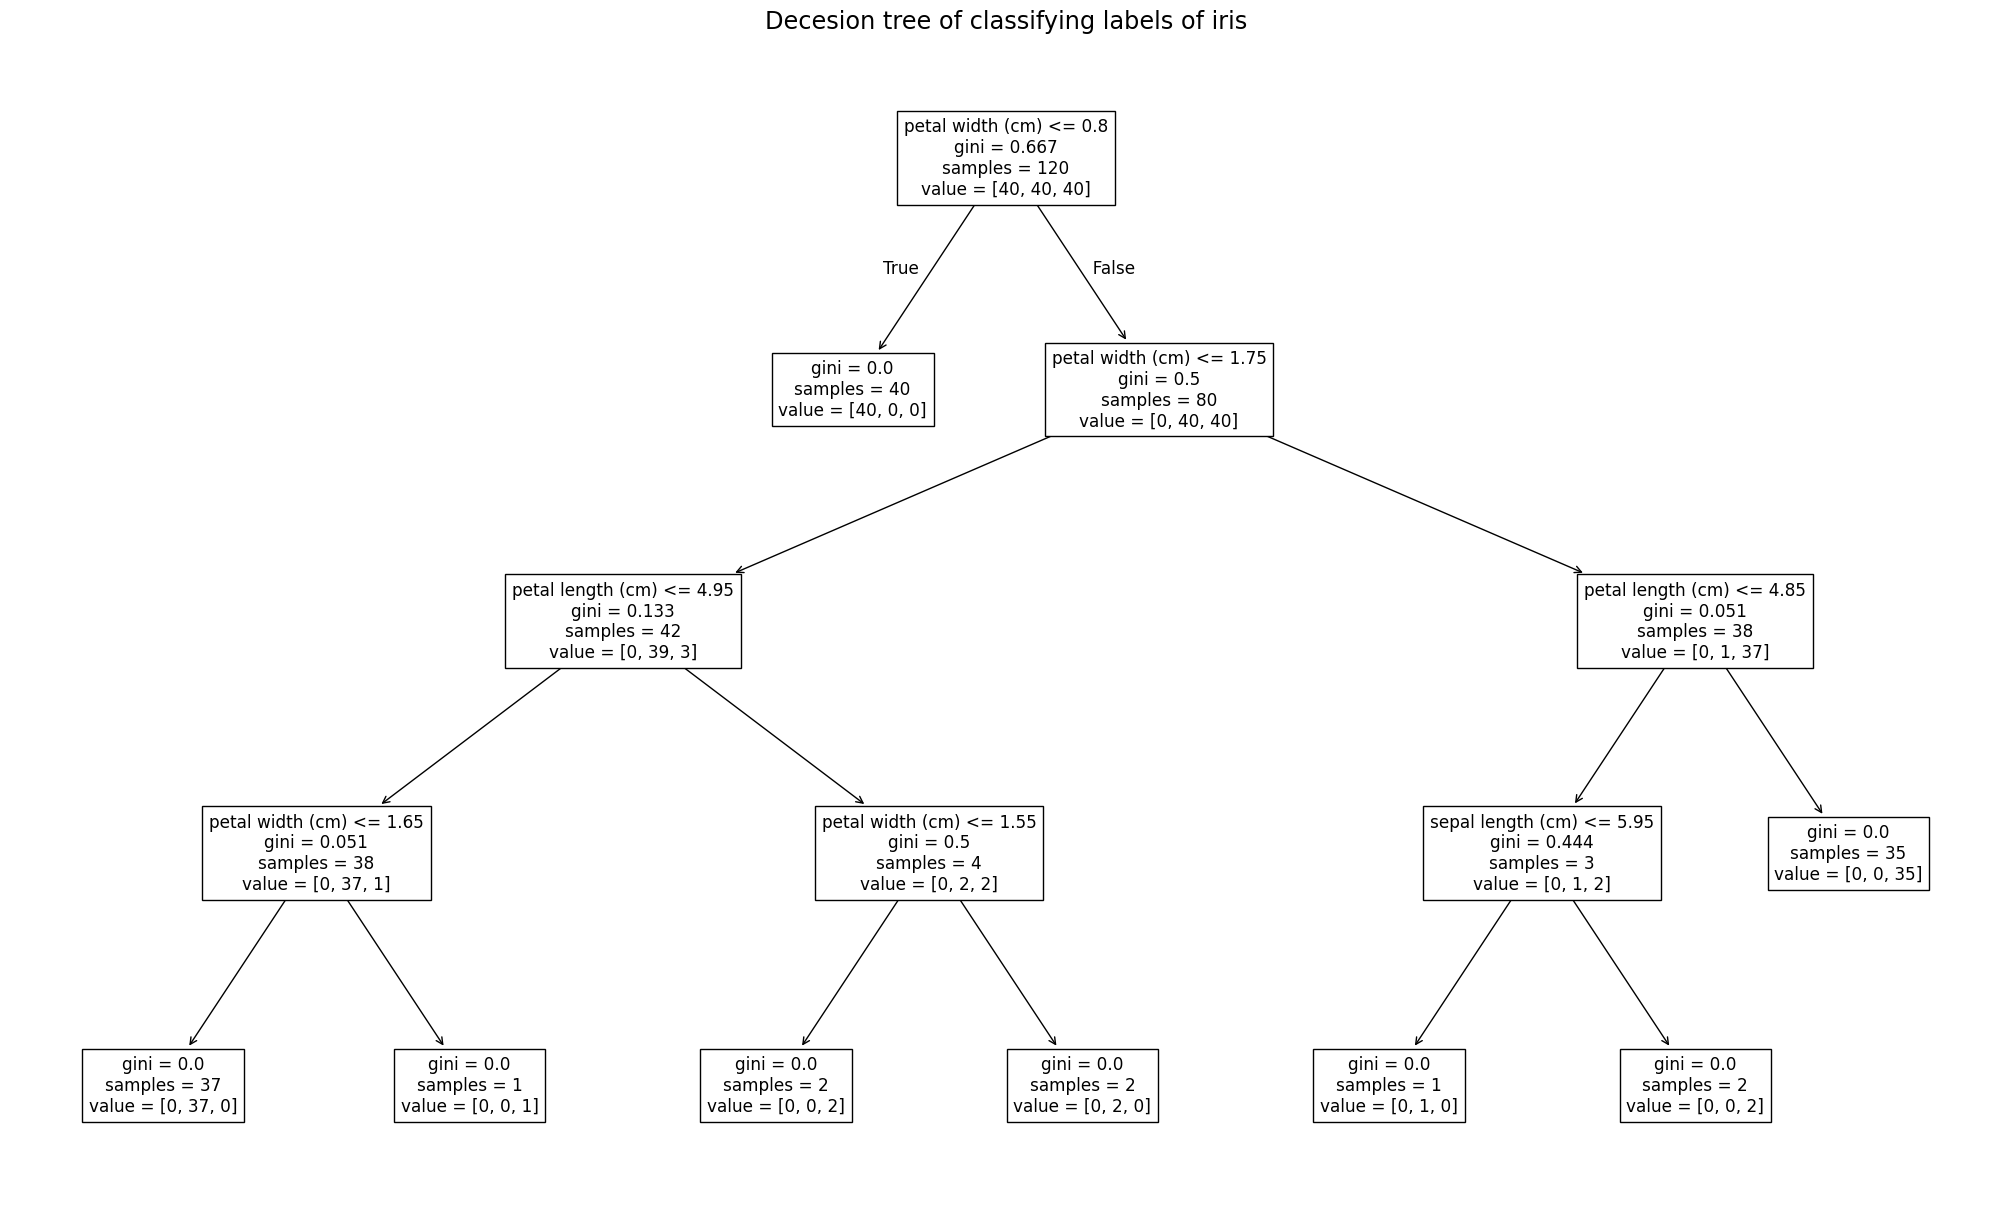

In [ ]:
plt.figure(figsize=(20, 12), layout='constrained')
plt.suptitle('Decesion tree of classifying labels of iris', fontsize='xx-large')
plot_tree(dt, feature_names=X_train.columns)
plt.show()

In [ ]:
# predict
pred_train = dt.predict(X_train)
pred_test = dt.predict(X_test)

print(f'학습용 데이터에 대한 예측: \n {X_pred}')
print()
print(f'시험용 데이터에 대한 예측: \n {y_pred}')

학습용 데이터에 대한 예측: 
 [0 0 0 0 1 0 2 2 1 2 2 1 0 1 2 2 0 1 1 0 2 0 0 2 2 1 1 0 2 2 1 1 0 2 2 1 2
 1 2 1 1 1 0 0 1 1 2 2 1 0 2 2 0 0 1 1 0 0 1 2 0 0 1 1 2 1 2 0 0 2 1 1 0 0
 2 1 2 0 1 2 2 1 2 0 1 0 0 2 2 1 2 0 0 0 0 0 1 1 1 2 0 2 0 2 0 1 1 1 1 0 2
 2 0 1 1 2 0 2 2 2]

시험용 데이터에 대한 예측: 
 [0 1 0 2 0 1 2 0 0 1 2 1 1 2 1 2 2 1 1 0 0 2 2 1 0 1 1 2 0 0]


### 모델 성능 평가

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy = accuracy_score(y_test, pred_test)
accuracy

0.9666666666666667